In [1]:
# datasets names: 
# weather freq 1d pred_len 30
# australian_electricity_demand freq 30T pred_len 60
# wind_farms_minutely freq 1T pred_len 60
# solar_10_minutes freq 10T pred_len 60
# solar_weekly freq 1W-SUN pred_len 5
# sunspot freq 1D pred_len 30
# solar_4_seconds freq 4S pred_len 60
# wind_4_seconds freq 4S pred_len 60
# temperature_rain freq 1D pred_len 30
# oikolab_weather freq 1H pred_len 48


In [1]:
import pandas as pd

wind_4_df = pd.read_csv('wind_4_seconds_dataset.tsf', sep='/t')

/var/folders/kq/pm1yfz_s1ql0068ss9pcrzch0000gn/T/ipykernel_5663/1885546877.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  wind_4_df = pd.read_csv('wind_4_seconds_dataset.tsf', sep='/t')


In [2]:
wind_4_df = list(map(float,wind_4_df.iloc[14]['# Dataset Information'].split(':')[2].split(',')))

In [3]:
wind_4_df

[18.6,
 18.6,
 18.6,
 18.6,
 18.6,
 18.6,
 18.6,
 19.6,
 19.6,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 18.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.5,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 15.1,
 15.1,
 15.1,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 17.2,
 17.2,
 17.2,
 17.2,
 17.2,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,
 16.8,

In [5]:
import numpy as np

logreturn = np.diff(np.log(wind_4_df)) # Transform closing price to log returns, instead of using min-max scaler

csum_logreturn = logreturn.cumsum()

/var/folders/kq/pm1yfz_s1ql0068ss9pcrzch0000gn/T/ipykernel_5663/3527521903.py:3: RuntimeWarning: divide by zero encountered in log
  logreturn = np.diff(np.log(wind_4_df)) # Transform closing price to log returns, instead of using min-max scaler
/var/folders/kq/pm1yfz_s1ql0068ss9pcrzch0000gn/T/ipykernel_5663/3527521903.py:3: RuntimeWarning: invalid value encountered in log
  logreturn = np.diff(np.log(wind_4_df)) # Transform closing price to log returns, instead of using min-max scaler
/Users/ruiite/miniconda3/envs/freq_trans/lib/python3.11/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


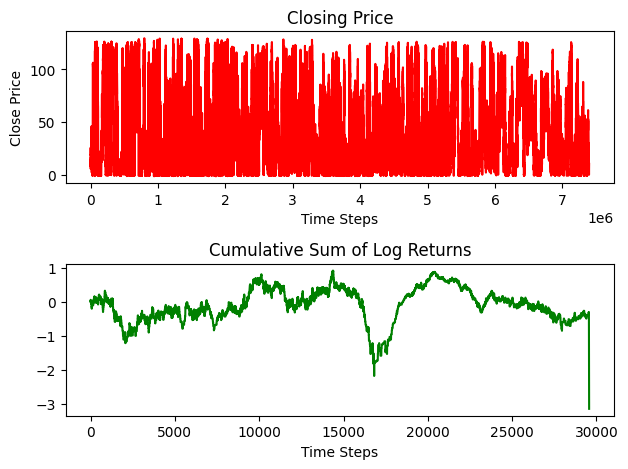

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].plot(wind_4_df, color='red')
axs[0].set_title('Closing Price')
axs[0].set_ylabel('Close Price')
axs[0].set_xlabel('Time Steps')

axs[1].plot(csum_logreturn, color='green')
axs[1].set_title('Cumulative Sum of Log Returns')
axs[1].set_xlabel('Time Steps')

fig.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

wind_scaler = MinMaxScaler()

wind_4_df = np.array(wind_4_df)

wind_4_min_max = wind_scaler.fit_transform(wind_4_df.reshape(-1,1))

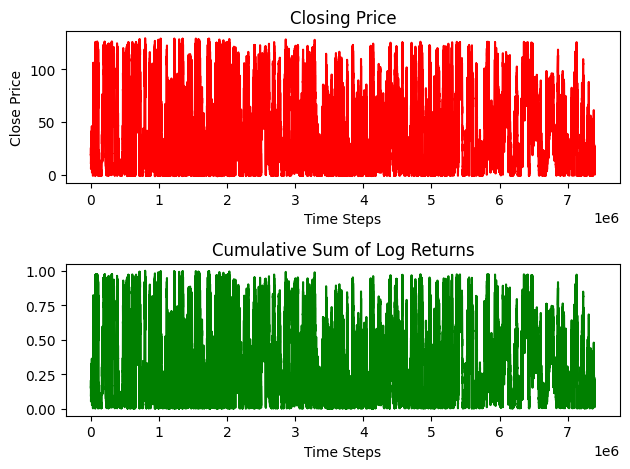

In [8]:

fig, axs = plt.subplots(2, 1)
axs[0].plot(wind_4_df, color='red')
axs[0].set_title('Closing Price')
axs[0].set_ylabel('Close Price')
axs[0].set_xlabel('Time Steps')

axs[1].plot(wind_4_min_max, color='green')
axs[1].set_title('Cumulative Sum of Log Returns')
axs[1].set_xlabel('Time Steps')

fig.tight_layout()
plt.show()

In [9]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import time
import math
import matplotlib.pyplot as plt

In [26]:
input_window = 60 # number of input steps
output_window = 1 # number of prediction steps, in this model its fixed to one
batch_size = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

In [27]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

In [28]:
wind_4_df.shape

(7397147,)

In [29]:
def get_data(data, split):
    """Split ratio of training data"""

    series = data
    
    split = round(split*len(series))
    train_data = series[:split]
    test_data = series[split:]

    # train_data = train_data.cumsum()
    # train_data = 2*train_data # Training data augmentation, increase amplitude for the model to better generalize.(Scaling by 2 is aribitrary)
    #                           # Similar to image transformation to allow model to train on wider data sets

    # test_data = test_data.cumsum()

    train_sequence = create_inout_sequences(train_data,input_window)
    train_sequence = train_sequence[:-output_window]

    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window]

    return train_sequence.to(device), test_data.to(device)

In [30]:
def get_batch(source, i, batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window, 1))
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window, 1))
    return input, target

In [31]:
def train(train_data):
    model.train() # Turn on the evaluation mode
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.10f} | {:5.2f} ms | '
                  'loss {:5.7f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss))
            total_loss = 0
            start_time = time.time()

In [32]:
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 1000
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i, eval_batch_size)
            output = eval_model(data)            
            total_loss += len(data[0])* criterion(output, targets).cpu().item()
    return total_loss / len(data_source)

In [33]:
def model_forecast(model, seqence):
    model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)

    seq = np.pad(seqence, (0, 3), mode='constant', constant_values=(0, 0))
    seq = create_inout_sequences(seq, input_window)
    seq = seq[:-output_window].to(device)

    seq, _ = get_batch(seq, 0, 1)
    with torch.no_grad():
        for i in range(0, output_window):            
            output = model(seq[-output_window:])                        
            seq = torch.cat((seq, output[-1:]))

    seq = seq.cpu().view(-1).numpy()

    return seq

In [34]:
def forecast_seq(model, sequences):
    """Sequences data has to been windowed and passed through device"""
    start_timer = time.time()
    model.eval() 
    forecast_seq = torch.Tensor(0)    
    actual = torch.Tensor(0)
    with torch.no_grad():
        for i in range(0, len(sequences) - 1):
            data, target = get_batch(sequences, i, 1)
            output = model(data)            
            forecast_seq = torch.cat((forecast_seq, output[-1].view(-1).cpu()), 0)
            actual = torch.cat((actual, target[-1].view(-1).cpu()), 0)
    timed = time.time()-start_timer
    print(f"{timed} sec")

    return forecast_seq, actual

In [41]:
from ts_transformer import TransformerModel

In [36]:
train_data, val_data = get_data(wind_4_min_max, 0.6) # 60% train, 40% test split

TypeError: TransformerModel.__init__() missing 1 required positional argument: 'prediction_length'

In [42]:
model = TransformerModel(prediction_length=output_window).to(device)

AttributeError: 'TransformerModel' object has no attribute 'input_emb'

In [ ]:
criterion = nn.MSELoss() # Loss function
lr = 0.00005 # learning rate

optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

epochs =  10 # Number of epochs

In [ ]:
for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)
    
    if(epoch % epochs == 0): # Valid model after last training epoch
        val_loss = evaluate(model, val_data)
        print('-' * 80)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss: {:5.7f}'.format(epoch, (time.time() - epoch_start_time), val_loss))
        print('-' * 80)

    else:   
        print('-' * 80)
        print('| end of epoch {:3d} | time: {:5.2f}s'.format(epoch, (time.time() - epoch_start_time)))
        print('-' * 80)

    scheduler.step() 


In [ ]:
plt.plot(truth, color='red', alpha=0.7)
plt.plot(test_result, color='blue', linewidth=0.7)
plt.title('Actual vs Forecast')
plt.legend(['Actual', 'Forecast'])
plt.xlabel('Time Steps')
plt.show()

In [25]:
len(wind_4_df)

47

In [ ]:
df2 = pd.read_csv('BA_raw.csv') # Boeing Co stock
close2 = df2['close'].fillna(method = 'ffill')
close2 = np.array(close2)
logreturn2 = np.diff(np.log(close2))

In [ ]:
train_data2, val_data2 = get_data(logreturn2, 0.6)
test2_eval = evaluate(model2, val_data2)
print(f'Test 2 loss: {test2_eval :.5f}')

In [ ]:
test_result2, truth2 = forecast_seq(model2, val_data2)

plt.plot(truth2, color='red', alpha=0.7)
plt.plot(test_result2, color='blue', linewidth=0.7)
plt.title('Actual vs Forecast')
plt.legend(['Actual', 'Forecast'])
plt.xlabel('Time Steps')
plt.show()